In [1]:
import os
import pickle as pkl
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data_dir = '/data/unagi0/ktokitake/encdecmodel/coco'
file_path = os.path.join(data_dir, 'sent_embs.pkl')
    

In [3]:
with open(file_path, 'rb') as f:
    x = pkl.load(f)

In [4]:
all_sent_embs, all_caps, all_keys, ixtoword = x[0],x[1],x[2], x[3]

In [5]:
idx = 1000
#key = 'COCO_train2014_{:012}'.format(id)
#idx = all_keys.index(key)
#idx = 100
target_sent = all_sent_embs[idx]
target_cap = all_caps[idx]

In [6]:
target_sent_2d = target_sent.unsqueeze(1)
matmul = torch.mm(all_sent_embs, target_sent_2d)
matmul_sorted, indices = torch.sort(matmul, dim=0, descending=True)


In [7]:
print(all_sent_embs.shape)
print(indices[:10])
print(matmul_sorted[:10])

torch.Size([82783, 256])
tensor([[ 1000],
        [79743],
        [58820],
        [ 5587],
        [34235],
        [  985],
        [ 3456],
        [ 7023],
        [23021],
        [ 7804]])
tensor([[19.5768],
        [17.1487],
        [16.4080],
        [16.3702],
        [15.7699],
        [15.7224],
        [15.6786],
        [15.6186],
        [15.5759],
        [15.0346]])


In [8]:
max_caps = all_caps[indices[:100].squeeze()]
print(max_caps.shape)

torch.Size([100, 80])


In [9]:
for i in range(100):
    words = []
    for j in range(80):
        word = ixtoword[max_caps[i][j].item()]
        if word=='<end>':
            continue
        words.append(word)
    print(' '.join(words))


a bag sitting on top of a table net to a curtain
a shelf with a porcelain shoe a vase and a drawings of a dress and a purse
a black suitcase a red bag and a pink and black bag
in front of a yellow staircase are suitcases a glass suitcase a real suitcase a suitcase shaped concrete block and a statue of a suitcase on its side
a bed two dressers some shoes and a red suitcase
pair of shoes under a bed with a bin and bag
pink suitcase with small bags of makeup and toiletries
a room filled with clothing a suitcase in an ironing board
a bathroom with a shower curtain printed with a browser error message
a piece of luggage sitting on top of a bed with a blanket
suitcases sit on a dressed up stage and bags on a dressed up table
a white shower curtain with a spiral pattern hanging in the bathroom
interior of bathroom with shower curtain and toiletries
a towel hanging on the shower curtain rail in the bathroom
an open luggage bag with a flask a camera and wallet
a black and white bathroom with a 

In [20]:
print('{:012}'.format(300))
print(np.random.choice(51, 10, replace=False))

000000000300
[ 8  4 11 43 40 19 48 17  9  1]


In [11]:
id = 245771
key = 'COCO_train2014_{:012}'.format(id)
idx = all_keys.index(key)

SyntaxError: invalid character in identifier (<ipython-input-11-870a992f0df5>, line 5)

In [15]:
filename_to_wrongcaps = {}
for idx, key in enumerate(all_keys):
    if idx%100==0:
        print(idx)
    target_keys = []
    target_sent = all_sent_embs[idx]
    target_cap = all_caps[idx]
    target_sent_2d = target_sent.unsqueeze(1)
    matmul = torch.mm(all_sent_embs, target_sent_2d)
    matmul_sorted, indices = torch.sort(matmul, dim=0, descending=True)
    for ind in indices[1:11]:
        target_key = all_keys[ind]
        target_keys.append(target_key)
    max_caps = all_caps[indices[1:11].squeeze()]
    #cap_ind = np.random.choice(50, 10, replace=False)
    #wrong_caps = max_caps[cap_ind]
    wrong_caps = max_caps
    filename_to_wrongcaps[key] = {'target_keys': target_keys, 'caps':  np.asarray(wrong_caps)}
   


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

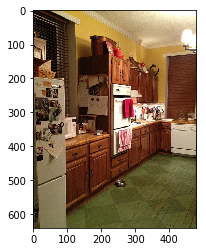

In [45]:
ind = 120
key = all_keys[ind]
img_path = os.path.join(data_dir, 'train/train2014', '%s.jpg' % key)
img = Image.open(img_path).convert('RGB')
plt.imshow(img)


check filename_to_wrongcaps

key: COCO_train2014_000000106047
a girl standing in front of a horse s yard
a woman in a yellow dress is petting a horse
two girls stand in a field holding the reigns of a horse
a man standing next to a brown horse in a park
the woman is leaning over the fence to pet the horse
a woman petting a horse in an open field
a woman standing next to a child in front of a horse
a woman wearing a horse shirt and cap walking along a path with two horses
a woman leading a saddled horse down a dirt path
a man in a black shirt and a brown horse eating grass
a man holding the bridle of a horse standing in front of a barn


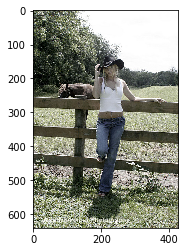

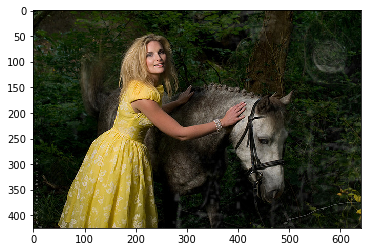

In [21]:
print('check filename_to_wrongcaps\n')
idx = 128
key = all_keys[idx]
print('key:', key)
target_keys = filename_to_wrongcaps[key]['target_keys']
wrong_caps = filename_to_wrongcaps[key]['caps']

img_path = os.path.join(data_dir, 'train/train2014', '%s.jpg' % key)
img = Image.open(img_path).convert('RGB')
plt.imshow(img)

cap = all_caps[idx]
words = []
for i in range(len(cap)):
    word = ixtoword[cap[i].item()]
    if word=='<end>':
        continue
    words.append(word)
print(' '.join(words))


for i, cap in enumerate(wrong_caps):
    words = []
    for j in range(len(cap)):
        word = ixtoword[cap[j].item()]
        if word=='<end>':
            continue
        words.append(word)
    print(' '.join(words))
    if i==0:
        img_path = os.path.join(data_dir, 'train/train2014', '%s.jpg' % target_keys[i])
        img = Image.open(img_path).convert('RGB')
        plt.figure()
        plt.imshow(img)





In [48]:
wrong_caps = filename_to_wrongcaps[key]
for cap in wrong_caps:
    words = []
    print((cap!=0).sum())
    for j in range(80):
        word = ixtoword[cap[j].item()]
        if word=='<end>':
            continue
        words.append(word)
    print(' '.join(words))

14
a kitchen area with a sink stove white cabinets and a door and window
12
a kitchen with a double sink a refrigerator and a counter top
13
a small galley kitchen with pink cabinets and a kettle on the stove
12
a kitchen counter stove top with pans microwave oven and open refrigerator
12
here is a compact kitchen that uses it s limited space well
12
a kitchen with a stove microwave counter cabinets and a toaster over
12
a clean kitchen with a stove hood range cabinets and a refrigerator
12
this kitchen has oak cabinets hardwood floors and pictures on the refrigerator
11
a small kitchen with two stoves a sink microwave and dishwasher
16
a kitchenette with wooden cabinets a microwave a small stove a kitchen sink and a dishwasher


In [22]:
pkl_file = os.path.join(data_dir, 'filename_to_wrongcaps.pkl')
with open(pkl_file, 'wb' ) as f:
    pkl.dump(filename_to_wrongcaps, f)

In [14]:
pkl_file = os.path.join(data_dir, 'filename_to_wrongcaps.pkl')
with open(pkl_file, 'rb' ) as f:
    x = pkl.load(f)

EOFError: Ran out of input